# EXERCISE 2

In a chemical process, three variables of interest are measured and monitored. The three variables are correlated to each other, and quality engineers would like to explore the possibility to reduce the dimensionality of the problem via PCA.
1. How many PCs are needed to capture at least 90% of variability (use the correlation matrix).
2. Compute the data reconstruction by using the first two PCs. 
3. Verify that using all the three PCs, the reconstructed data coincide with the original data. 

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the dataset
data = pd.read_csv('ESE05_ex2.csv')

# Print the first 5 rows of the dataset
data.head()

,Ph1,Ph2,Ph3
0,0.801765,1.224439,0.460368
1,1.529265,2.354552,0.512780
2,-0.767775,0.185170,-0.669498
3,0.983894,1.103092,0.237085
4,0.678907,1.879489,0.279479


## Point 1

How many PCs are needed to capture at least 90% of variability (use the correlation matrix).

> ### Solution
>
> Let's plot the data.

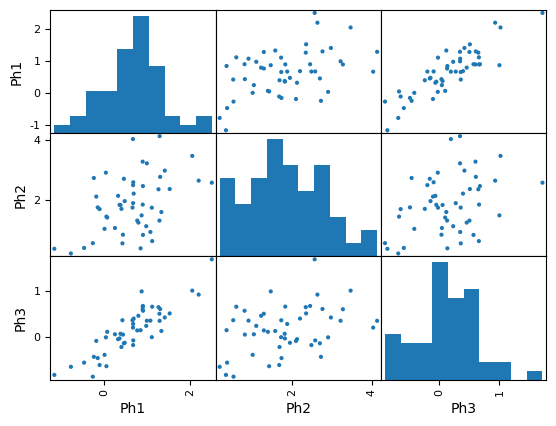

In [2]:
# Create a correlation plot of the dataset
pd.plotting.scatter_matrix(data, alpha = 1)
plt.show()

> If we want to apply the PCA on the correlation matrix, we need to standardize the data first.

In [3]:
# Standardize the data by subtracting the mean and dividing by the standard deviation
data_std = (data - data.mean()) / data.std()

data_std.describe()

,Ph1,Ph2,Ph3
count,5.000000e+01,5.000000e+01,5.000000e+01
mean,-2.042810e-16,1.820766e-16,-4.884981e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.557023e+00,-1.719188e+00,-2.016354e+00
25%,-5.426323e-01,-7.366496e-01,-5.505967e-01
50%,3.022747e-02,-7.030451e-02,-3.836797e-02
75%,5.655968e-01,7.291376e-01,6.458239e-01
max,2.609332e+00,2.374717e+00,2.989271e+00


> Let's compute the covariance matrix on the standardized data. 

In [4]:
cov_matrix_std = data_std.cov()
print(cov_matrix_std)

          Ph1       Ph2       Ph3
Ph1  1.000000  0.451571  0.872272
Ph2  0.451571  1.000000  0.366454
Ph3  0.872272  0.366454  1.000000


> Now compare it with the correlation matrix computed on the original data.

In [5]:
corr_matrix = data.corr()
print(corr_matrix)

          Ph1       Ph2       Ph3
Ph1  1.000000  0.451571  0.872272
Ph2  0.451571  1.000000  0.366454
Ph3  0.872272  0.366454  1.000000


> The two matrices are the same.
>
> Now perform the PCA on the standardized data.

In [6]:
# import the libraries for PCA
from sklearn.decomposition import PCA

# Create the PCA object
pca_std = PCA()
# Fit the PCA object to the data
pca_std.fit(data_std)
# Print the eigenvalues
print("Eigenvalues \n", pca_std.explained_variance_)
# Print the eigenvectors
print("\nEigenvectors \n", pca_std.components_)
# Print the explained variance ratio
print("\nExplained variance ratio \n", pca_std.explained_variance_ratio_)
# Print the cumulative explained variance ratio
print("\nCumulative explained variance ratio \n", np.cumsum(pca_std.explained_variance_ratio_))


Eigenvalues 
 [2.16092041 0.7166299  0.12244969]

Eigenvectors 
 [[ 0.64199397  0.44647182  0.62330302]
 [-0.25082525  0.89052683 -0.37953744]
 [-0.72452083  0.08732061  0.68369926]]

Explained variance ratio 
 [0.7203068  0.23887663 0.04081656]

Cumulative explained variance ratio 
 [0.7203068  0.95918344 1.        ]


> To capture at least 90% of variability, we need at least two PCs.

> Plot the scree plot to compare the eigenvalues.

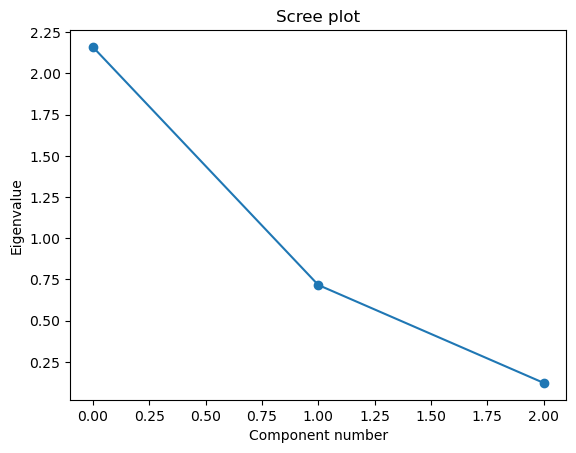

In [7]:
# Plot the eigenvalues (scree plot)
plt.plot(pca_std.explained_variance_, 'o-')
plt.xlabel('Component number')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.show()

> Plot the cumulated explained variance.

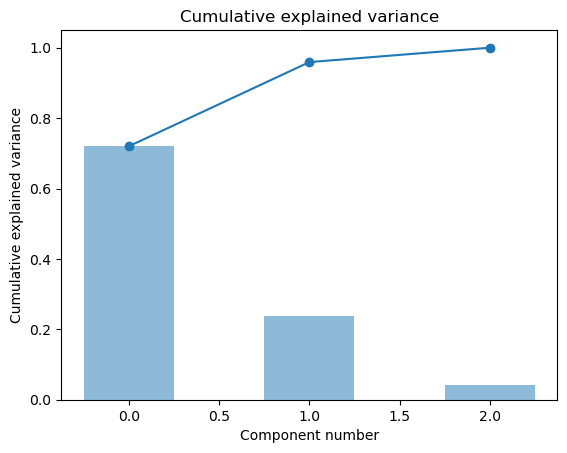

In [8]:
# Plot the cumulative explained variance
plt.plot(np.cumsum(pca_std.explained_variance_ratio_), 'o-')
# add a bar chart to the plot
plt.bar(range(0, len(pca_std.explained_variance_ratio_)), pca_std.explained_variance_ratio_, width = 0.5, alpha=0.5, align='center')
plt.xlabel('Component number')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance')
plt.show()

> Now plot the loadings. 

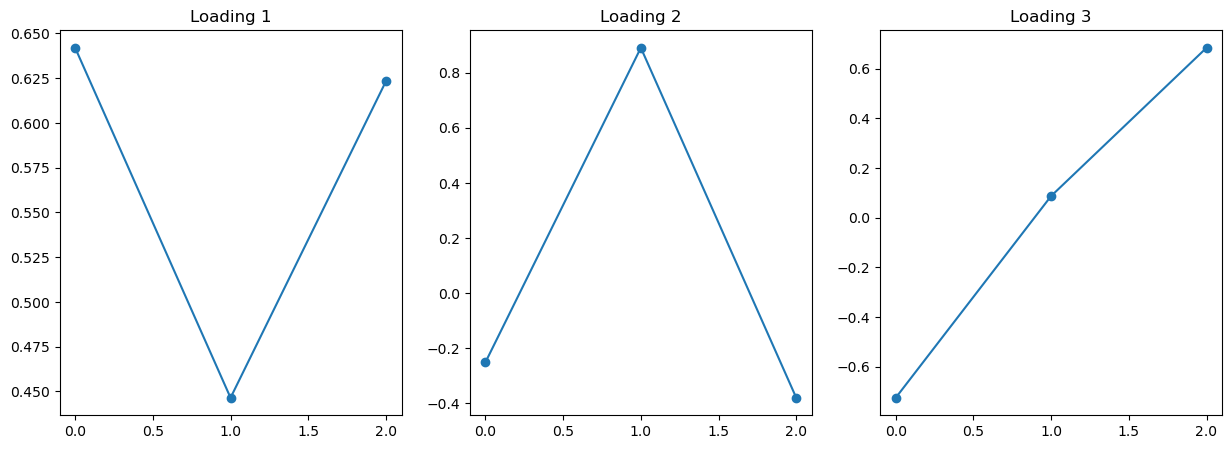

In [9]:
# Plot the loadings
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(pca_std.components_[0], 'o-')
ax[0].set_title('Loading 1')
ax[1].plot(pca_std.components_[1], 'o-')
ax[1].set_title('Loading 2')
ax[2].plot(pca_std.components_[2], 'o-')
ax[2].set_title('Loading 3')
plt.show()

> Now compute the scores and plot the scatterplot of the scores along the first two PCs.

In [10]:
# Compute the scores
scores = pca_std.transform(data_std)
# create a dataframe with the scores
scores_df = pd.DataFrame(scores, columns = ['z1', 'z2', 'z3'])
# Print the first rows of the scores dataframe
scores_df.head()

,z1,z2,z3
0,0.204177,-0.842842,0.195432
1,1.449036,-0.095903,-0.377142
2,-3.055249,-0.420149,0.218142
3,0.044956,-0.856034,-0.295842
4,0.178707,-0.062674,0.142082


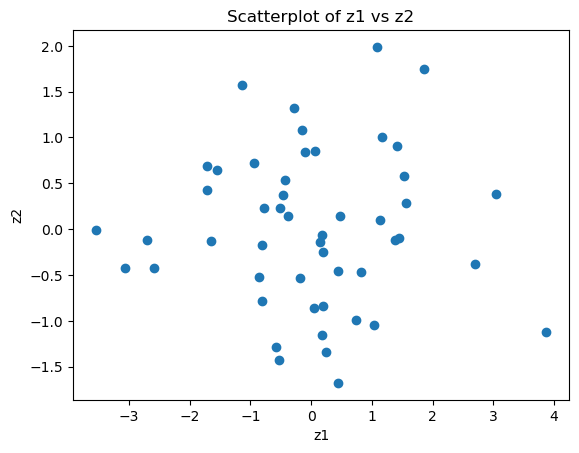

In [11]:
# Create a scatterplot with the first two scores
plt.scatter(scores_df['z1'], scores_df['z2'])
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('Scatterplot of z1 vs z2')
plt.show()

## Point 2

Compute the data reconstruction by using the first two PCs. 

> ### Solution
> 
> Data reconstruction based on the first $K=2$ PCs. 
> $$\mathbf{\hat{x}}_j^*(K) = z_{j1}\mathbf{u_1} + z_{j2}\mathbf{u_2}$$
> for $j=1,\ldots,n$.
>
> Remind that we are using the standardized data $\mathbf{\hat{x}}_j^*$. If we want to reconstruct the original data $\mathbf{\hat{x}}_j$, we need to multiply the reconstructed data by the standard deviation and add the mean.
> $$\mathbf{\hat{x}}_j(K) = \mathbf{\hat{x}}_j^* s_i + \bar{x}_i$$

In [12]:
# First let's save in an array the mean and standard deviation of the original data
mean = data.mean()
std = data.std()

# Compute the reconstructed data_std using the first two principal components
reconstructed_data_std = scores_df[['z1', 'z2']].dot(pca_std.components_[0:2, :])
# Now use the mean and standard deviation to compute the reconstructed data
reconstructed_data = reconstructed_data_std.dot(np.diag(std)) + np.asarray(mean)

# Compare the original data with the reconstructed data
print("Original data\n", data.head())
print("\nReconstructed (ORIGINAL) data\n", reconstructed_data.head())



Original data
         Ph1       Ph2       Ph3
0  0.801765  1.224439  0.460368
1  1.529265  2.354552  0.512780
2 -0.767775  0.185170 -0.669498
3  0.983894  1.103092  0.237085
4  0.678907  1.879489  0.279479

Reconstructed (ORIGINAL) data
           0         1         2
0  0.902098  1.207970  0.391005
1  1.335644  2.386335  0.646636
2 -0.655783  0.166786 -0.746921
3  0.832011  1.128023  0.342085
4  0.751850  1.867516  0.229052


> The reconstructed data are different from the original data.

## Point 3

Verify that using all the three PCs, the reconstructed data coincide with the original data.

> ### Solution
>
> Data reconstruction based on all the PCs ($K=3$).

In [13]:
# Compute the reconstructed data_std using the first two principal components
reconstructed_data_std_3 = scores_df.dot(pca_std.components_)
# Now use the mean and standard deviation to compute the reconstructed data
reconstructed_data_3 = reconstructed_data_std_3.dot(np.diag(std)) + np.asarray(mean)

# Compare the original data with the reconstructed data
print("Original data\n", data.head())
print("Reconstructed (ORIGINAL) data\n", reconstructed_data_3.head())



Original data
         Ph1       Ph2       Ph3
0  0.801765  1.224439  0.460368
1  1.529265  2.354552  0.512780
2 -0.767775  0.185170 -0.669498
3  0.983894  1.103092  0.237085
4  0.678907  1.879489  0.279479
Reconstructed (ORIGINAL) data
           0         1         2
0  0.801765  1.224439  0.460368
1  1.529265  2.354552  0.512780
2 -0.767775  0.185170 -0.669498
3  0.983894  1.103092  0.237085
4  0.678907  1.879489  0.279479


> The reconstructed data coincide with the original data.